<a href="https://colab.research.google.com/github/JJang770/GitHub_tutorial/blob/main/Copy_of_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/WgsZc_wS2qQ?si=gRwfrrmMTnczoMIN

세상에서 가장쉬운 딥러닝, TorchVision - Python, Deep Learning

In [1]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [2]:
'''
brew install libomp (for OSX)
pip install torchtext -U
'''
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

pytorch 2.1.0+cu121
torchvision 0.16.0+cu121


In [3]:
IMG_SIZE = 480

COLORS = np.array([
    (0, 0, 0),       # 0=background
    (128, 0, 0),     # 1=aeroplane
    (0, 128, 0),     # 2=bicycle
    (128, 128, 0),   # 3=bird
    (0, 0, 128),     # 4=boat
    (128, 0, 128),   # 5=bottle
    (0, 128, 128),   # 6=bus
    (128, 128, 128), # 7=car
    (255, 255, 255), # 8=cat
    (192, 0, 0),     # 9=chair
    (64, 128, 0),    # 10=cow
    (192, 128, 0),   # 11=dining table
    (64, 0, 128),    # 12=dog
    (192, 0, 128),   # 13=horse
    (64, 128, 128),  # 14=motorbike
    (192, 128, 128), # 15=person
    (0, 64, 0),      # 16=potted plant
    (128, 64, 0),    # 17=sheep
    (0, 192, 0),     # 18=sofa
    (128, 192, 0),   # 19=train
    (0, 64, 128)     # 20=tv/monitor
])

# Download Model

In [5]:
deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

# Load Image

img shape:(959, 640, 3)


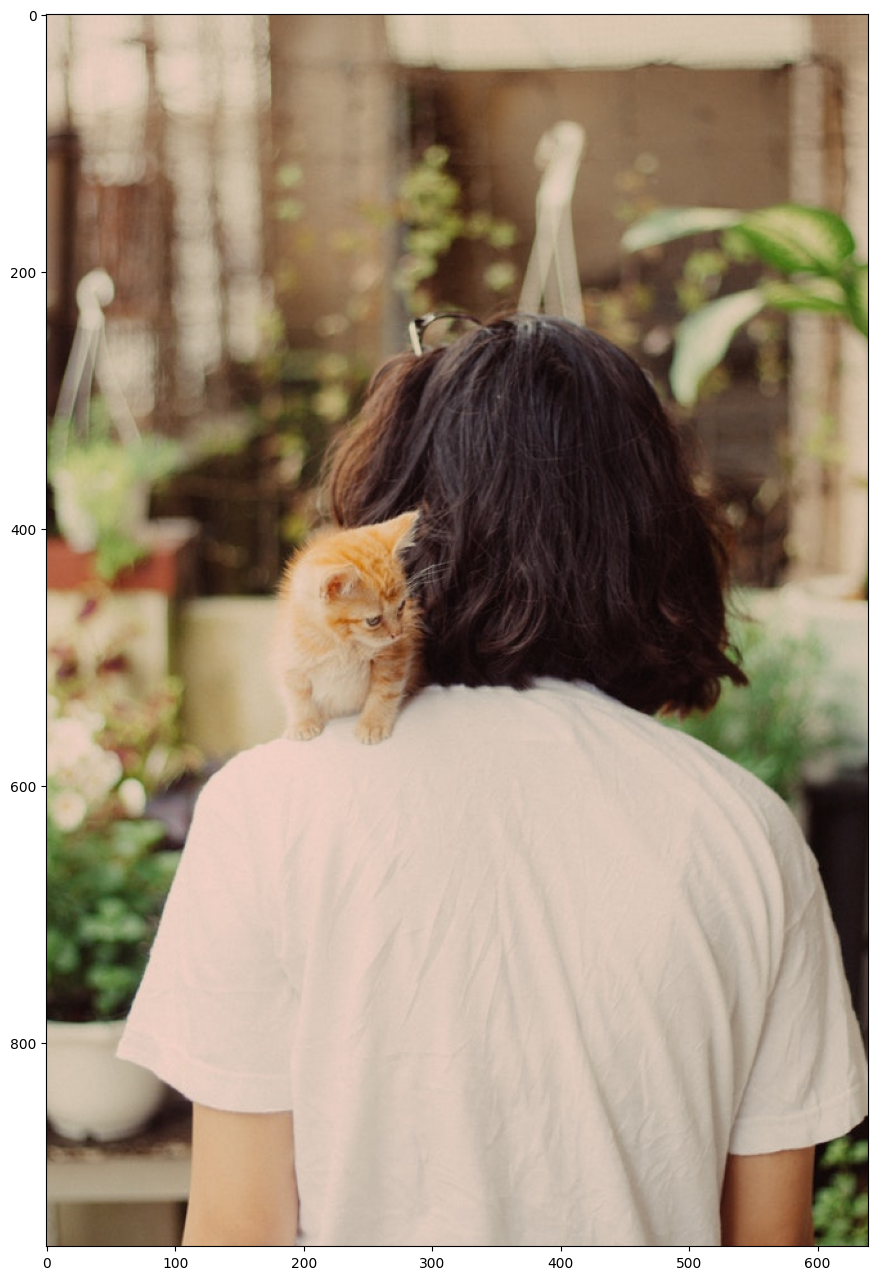

In [6]:
img = Image.open('/content/drive/MyDrive/fastcampus_vision/imgs/03.jpg')
img_arr = np.array(img)
print(f'img shape:{img_arr.shape}')

plt.figure(figsize=(16, 16))
plt.imshow(img)



# Image to Tensor

- T.Resize(256) : Resizes the image to size width 256
- T.CenterCrop(224) : Center Crops the image to have a resulting size of 224 x 224
- T.ToTensor() : Converts the image to type torch.Tensor and have values between [0, 1]
- T.Normalize(mean, std) : Normalizes the image with the given mean and standard deviation.

In [9]:
trf = T.Compose([
    T.Resize(IMG_SIZE),
#    T.CenterCrop(IMG_SIZE), # make square image
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_img = trf(img).unsqueeze(0)
print(f'input_img shape:{input_img.shape}')

input_img shape:torch.Size([1, 3, 719, 480])


# Inference

- [1, 21, 256, 256]
- 1: batch_size
- 21: classes
- 256, 256: image size

In [16]:
out = deeplab(input_img)['out']

print(out.shape)

torch.Size([1, 21, 719, 480])


# Extract Class Map

In [17]:
out = torch.argmax(out.squeeze(), dim=0)
print(out.shape)
out = out.detach().cpu().numpy()


print(out.shape)
print(np.unique(out))

torch.Size([719, 480])
(719, 480)
[ 0  8 15 16]


# Class Map to Segmentation Map

In [18]:
def seg_map(img, n_classes=21):
    rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for c in range(n_classes):
        idx = img == c

        rgb[idx] = COLORS[c]

    return rgb

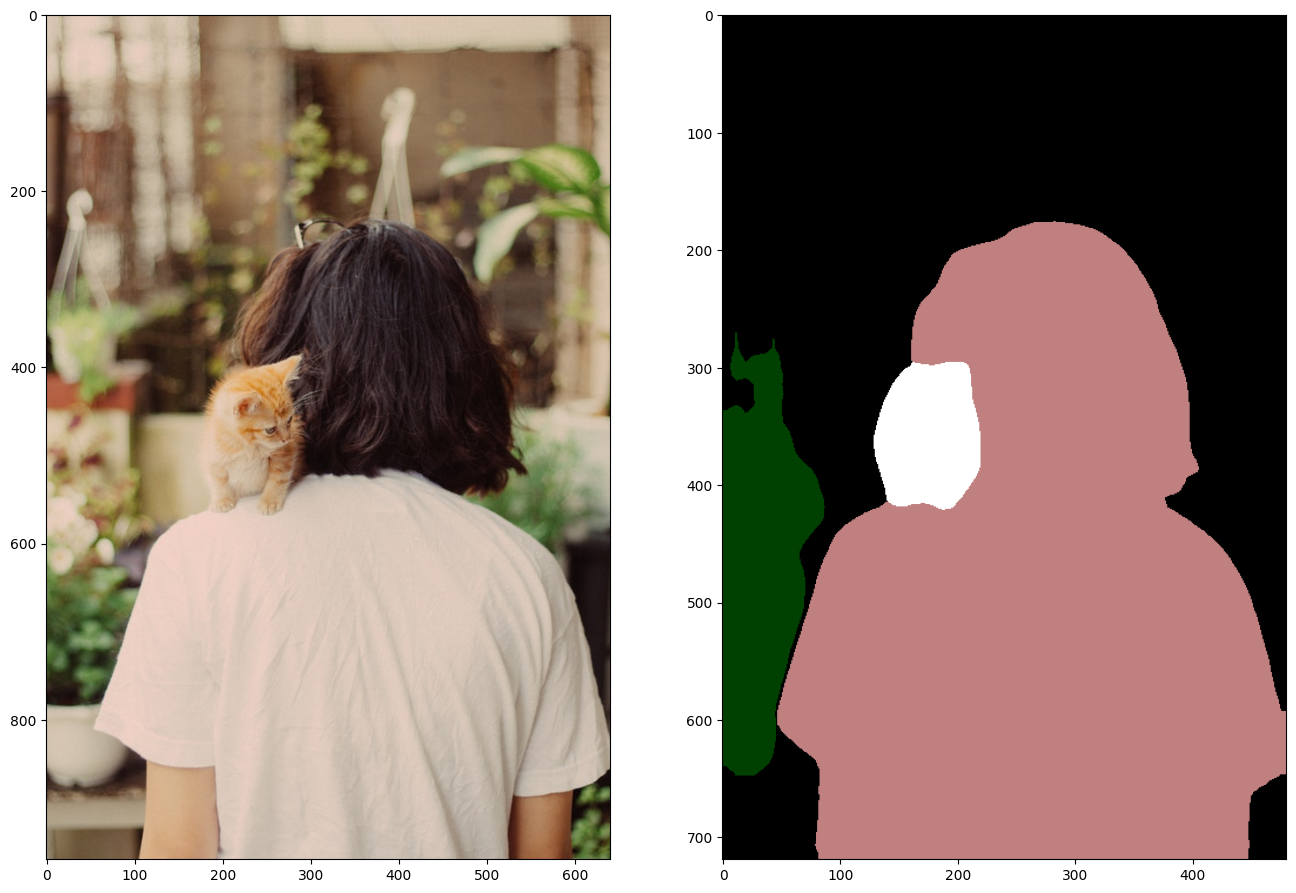

In [19]:
out_seg = seg_map(out)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
ax[0].imshow(img)
ax[1].imshow(out_seg)